# Analyse prédictive  
---
Il s'agira ici de mettre en place un modèle prédictif basé sur plusieurs variables en trouvant la technique la plus adaptée (le modèle le plus précis)

## Importation  du fichier principal 
---

In [37]:
# charger données et packages 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
df_reg = pd.read_csv("linear_reg.csv")
df_reg = df_reg.drop(columns = ["Unnamed: 0"])


## Mise en place du modèle de régression linéaire
---

In [51]:
# définir les variables 
x = pd.DataFrame(np.c_[df_reg['GDP'], df_reg['population (millions)'], df_reg['Host'],
                       df_reg['GDP/capita'], df_reg["GNI"], df_reg["number of 65+"]],
                 columns=["GDP", "population (millions)", "GDP/capita", "GNI", "number of 65+", "Host"])
x = x.dropna()
y1 = df_reg["Medal share"]
# distinguer valeurs de test et d'entrainement 
x_train, x_test, y1_train, y1_test = train_test_split(x, y1, test_size = 0.3, random_state= 12)
# mettre à l'échelle les données 
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(x_train)
#x_train = scaler.transform(x_train)
#x_test = scaler.transform(x_test)
# créer le modèle 
linear_model = LinearRegression(n_jobs = -1) 
# entraîner le modèle aux données 
linear_model.fit(x_train, y1_train)
# évaluer la qualité du modèle sur le subset d'entrainement 
y1_train_predict = linear_model.predict(x_train)
# racine carrée de l'erreur quadratique moyenne du modèle
rmse = (np.sqrt(mean_squared_error(y1_train, y1_train_predict)))
r2 = r2_score(y1_train, y1_train_predict)

# on imprime les résultats de cette évaluation 
print("La performance du Modèle pour le set de Training")
print("------------------------------------------------")
print("l'erreur RMSE est {:.3}".format(rmse))
print('le score R2 est {:.3}'.format(r2))
print("\n")
# évaluation du modèle pour le set de test 
y1_test_predict = linear_model.predict(x_test)
# racine carrée de l'erreur quadratique moyenne du modèle
rmse_test = (np.sqrt(mean_squared_error(y1_test, y1_test_predict)))
# score R carré du modèle
r2_test = r2_score(y1_test, y1_test_predict)
print("La performance du Modèle pour le set de Test")
print("--------------------------------------------")
print("l'erreur RMSE est {:.3}".format(rmse_test))
print('le score R2 est {:.3}'.format(r2_test))
# variable prédite 
# y1_predicted = reg_model.predict(x)


La performance du Modèle pour le set de Training
------------------------------------------------
l'erreur RMSE est 1.4
le score R2 est 0.748


La performance du Modèle pour le set de Test
--------------------------------------------
l'erreur RMSE est 1.08
le score R2 est 0.755


## Régression Lasso 
---

In [39]:
from sklearn.linear_model import Lasso

# Créer le modèle de régression polynomiale avec Lasso
alpha = 0.9 # Paramètre de régularisation
degree = 2
lasso_model = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=alpha))

# Entraîner le modèle sur les données d'entraînement
lasso_model.fit(x_train, y1_train)

# Évaluer la qualité du modèle sur le sous-ensemble d'entraînement
y1_train_predict = lasso_model.predict(x_train)
rmse_train = np.sqrt(mean_squared_error(y1_train, y1_train_predict))
r2_train = r2_score(y1_train, y1_train_predict)

# Afficher les résultats de l'évaluation sur le sous-ensemble d'entraînement
print("Performance du modèle pour l'ensemble d'entraînement")
print("--------------------------------------------------")
print("RMSE : {:.3f}".format(rmse_train))
print("Score R2 : {:.3f}".format(r2_train))
print("\n")

# Évaluer le modèle sur l'ensemble de test
y1_test_predict = lasso_model.predict(x_test)
rmse_test = np.sqrt(mean_squared_error(y1_test, y1_test_predict))
r2_test = r2_score(y1_test, y1_test_predict)

# Afficher les résultats de l'évaluation sur l'ensemble de test
print("Performance du modèle pour l'ensemble de test")
print("-------------------------------------------")
print("RMSE : {:.3f}".format(rmse_test))
print("Score R2 : {:.3f}".format(r2_test))


Performance du modèle pour l'ensemble d'entraînement
--------------------------------------------------
RMSE : 2.318
Score R2 : 0.309


Performance du modèle pour l'ensemble de test
-------------------------------------------
RMSE : 1.610
Score R2 : 0.459


## Régression Ridge 
---

In [40]:
from sklearn.linear_model import Ridge

# Créer le modèle de régression polynomiale avec Ridge
alpha = 0.7  # Paramètre de régularisation
ridge_model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha))

# Entraîner le modèle sur les données d'entraînement
ridge_model.fit(x_train, y1_train)

# Évaluer la qualité du modèle sur le sous-ensemble d'entraînement
y1_train_predict = ridge_model.predict(x_train)
rmse_train = np.sqrt(mean_squared_error(y1_train, y1_train_predict))
r2_train = r2_score(y1_train, y1_train_predict)

# Afficher les résultats de l'évaluation sur le sous-ensemble d'entraînement
print("Performance du modèle pour l'ensemble d'entraînement")
print("--------------------------------------------------")
print("RMSE : {:.3f}".format(rmse_train))
print("Score R2 : {:.3f}".format(r2_train))
print("\n")

# Évaluer le modèle sur l'ensemble de test
y1_test_predict = ridge_model.predict(x_test)
rmse_test = np.sqrt(mean_squared_error(y1_test, y1_test_predict))
r2_test = r2_score(y1_test, y1_test_predict)

# Afficher les résultats de l'évaluation sur l'ensemble de test
print("Performance du modèle pour l'ensemble de test")
print("-------------------------------------------")
print("RMSE : {:.3f}".format(rmse_test))
print("Score R2 : {:.3f}".format(r2_test))


Performance du modèle pour l'ensemble d'entraînement
--------------------------------------------------
RMSE : 0.961
Score R2 : 0.881


Performance du modèle pour l'ensemble de test
-------------------------------------------
RMSE : 1.224
Score R2 : 0.687


## Tentative de régression polynomiale 
---

Performance du modèle pour l'ensemble d'entraînement
--------------------------------------------------
RMSE : 1.369
Score R2 : 0.725


Performance du modèle pour l'ensemble de test
-------------------------------------------
RMSE : 1.235
Score R2 : 0.783


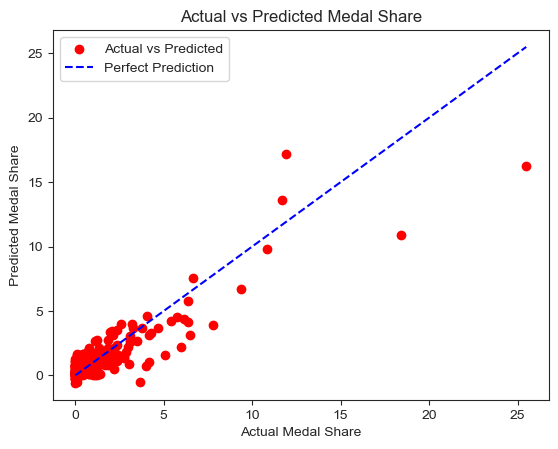

In [41]:
# Définir les variables
x = pd.DataFrame(np.c_[df_reg['GDP'], df_reg['population (millions)'], df_reg['Host'],
                       df_reg['GDP/capita'], df_reg["GNI"], df_reg["number of 65+"]],
                 columns=["GDP", "population (millions)", "GDP/capita", "GNI", "number of 65+", "Host"])
x = x.dropna()
y1 = df_reg["Medal share"]

# Distinguer les valeurs de test et d'entraînement
x_train, x_test, y1_train, y1_test = train_test_split(x, y1, test_size=0.4, random_state = 2)

# Créer le modèle de régression polynomiale
degree = 1  # Degré du polynôme
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Entraîner le modèle sur les données d'entraînement
poly_model.fit(x_train, y1_train)

# Évaluer la qualité du modèle sur le sous-ensemble d'entraînement
y1_train_predict = poly_model.predict(x_train)
rmse_train = np.sqrt(mean_squared_error(y1_train, y1_train_predict))
r2_train = r2_score(y1_train, y1_train_predict)

# Afficher les résultats de l'évaluation sur le sous-ensemble d'entraînement
print("Performance du modèle pour l'ensemble d'entraînement")
print("--------------------------------------------------")
print("RMSE : {:.3f}".format(rmse_train))
print("Score R2 : {:.3f}".format(r2_train))
print("\n")

# Évaluer le modèle sur l'ensemble de test
y1_test_predict = poly_model.predict(x_test)
rmse_test = np.sqrt(mean_squared_error(y1_test, y1_test_predict))
r2_test = r2_score(y1_test, y1_test_predict)

# Afficher les résultats de l'évaluation sur l'ensemble de test
print("Performance du modèle pour l'ensemble de test")
print("-------------------------------------------")
print("RMSE : {:.3f}".format(rmse_test))
print("Score R2 : {:.3f}".format(r2_test))


# faire un graphique
plt.scatter(y1_test, y1_test_predict, color='red', label='Actual vs Predicted')
plt.plot([min(y1_test), max(y1_test)], [min(y1_test), max(y1_test)], color='blue', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Medal Share')
plt.xlabel('Actual Medal Share')
plt.ylabel('Predicted Medal Share')
plt.legend()
plt.show()


## Random forest regressor
---

Performance du modèle pour l'ensemble d'entraînement
--------------------------------------------------
RMSE : 0.574
Score R2 : 0.953


Performance du modèle pour l'ensemble de test
-------------------------------------------
RMSE : 1.128
Score R2 : 0.810


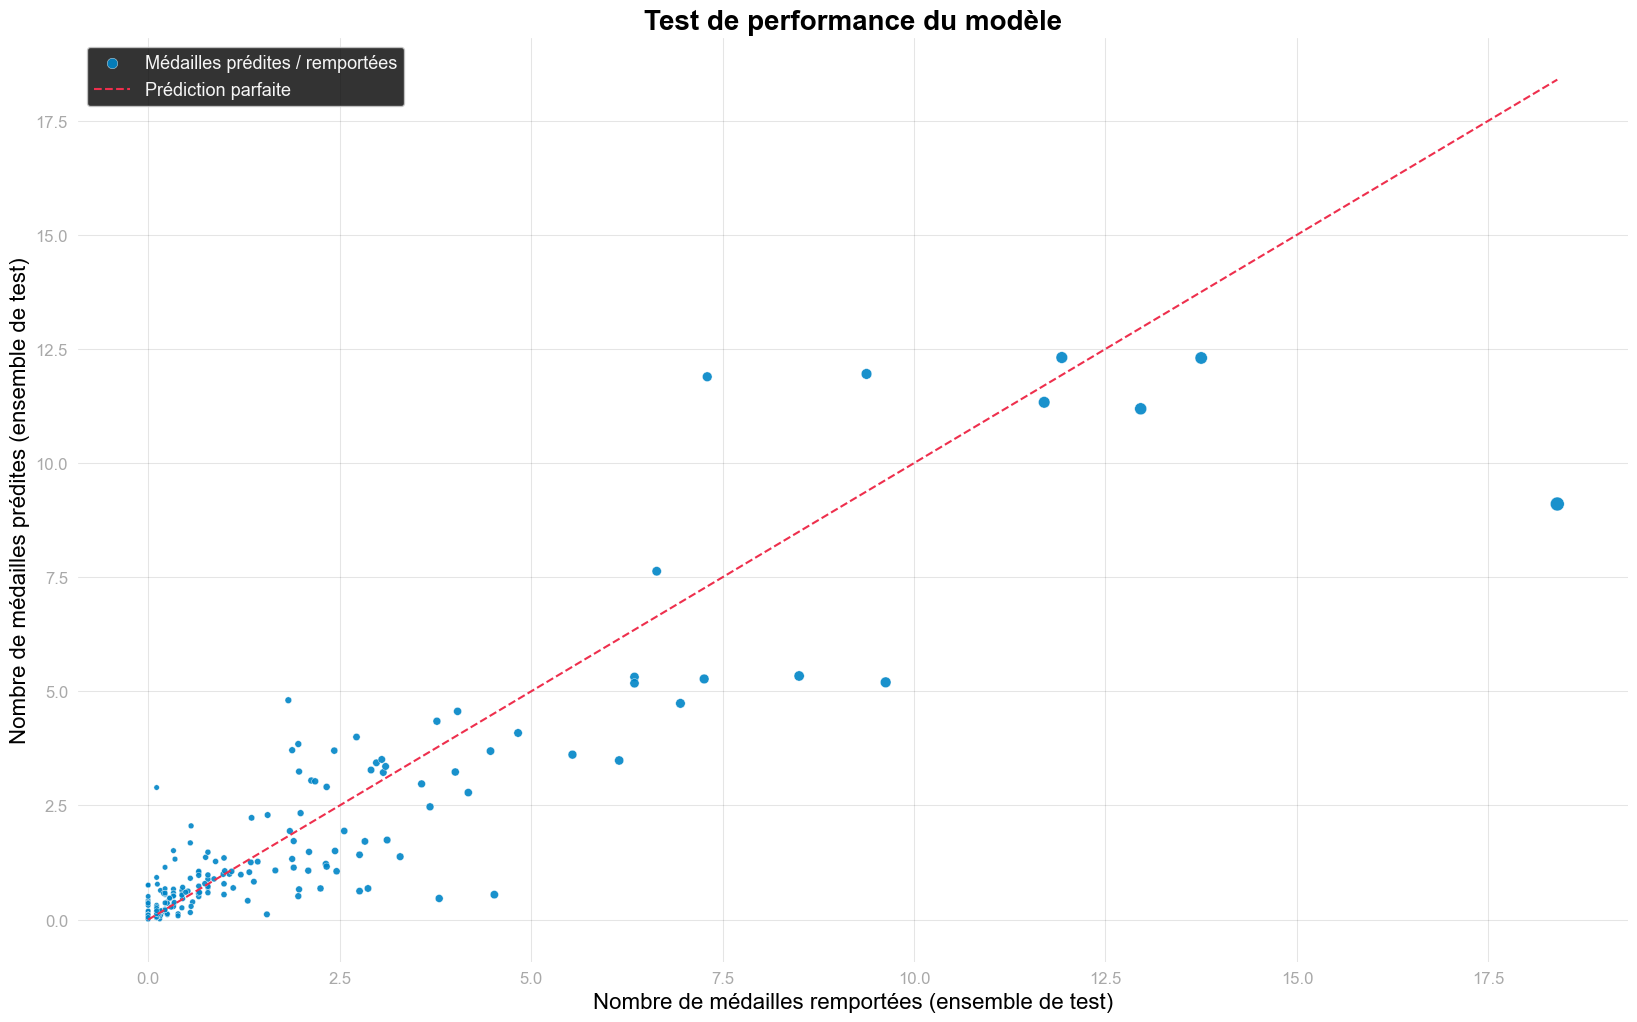

In [42]:
from sklearn.ensemble import RandomForestRegressor
# Définir les variables
x = pd.DataFrame(np.c_[df_reg['GDP'], df_reg['population (millions)'], df_reg['Host'],
                       df_reg['GDP/capita'], df_reg["GNI"], df_reg["number of 65+"]],
                 columns=["GDP", "population (millions)", "GDP/capita", "GNI", "number of 65+", "Host"])
x = x.dropna()
y1 = df_reg["Medal share"]

# Distinguer les valeurs de test et d'entraînement
x_train, x_test, y1_train, y1_test = train_test_split(x, y1, test_size=0.35, random_state = 5)

# Créer le modèle Random Forest
n_estimators = 50  # Nombre d'arbres dans la forêt
random_forest_model = RandomForestRegressor(n_estimators=n_estimators)

# Entraîner le modèle sur les données d'entraînement
random_forest_model.fit(x_train, y1_train)

# Évaluer la qualité du modèle sur le sous-ensemble d'entraînement
y1_train_predict = random_forest_model.predict(x_train)
rmse_train = np.sqrt(mean_squared_error(y1_train, y1_train_predict))
r2_train = r2_score(y1_train, y1_train_predict)

# Afficher les résultats de l'évaluation sur le sous-ensemble d'entraînement
print("Performance du modèle pour l'ensemble d'entraînement")
print("--------------------------------------------------")
print("RMSE : {:.3f}".format(rmse_train))
print("Score R2 : {:.3f}".format(r2_train))
print("\n")

# Évaluer le modèle sur l'ensemble de test
y1_test_predict = random_forest_model.predict(x_test)
rmse_test = np.sqrt(mean_squared_error(y1_test, y1_test_predict))
r2_test = r2_score(y1_test, y1_test_predict)

# Afficher les résultats de l'évaluation sur l'ensemble de test
print("Performance du modèle pour l'ensemble de test")
print("-------------------------------------------")
print("RMSE : {:.3f}".format(rmse_test))
print("Score R2 : {:.3f}".format(r2_test))

# on essaie un autre plus joli 
sb.set_style(style = "darkgrid")
# définir des couleurs selon la charte des JO 
ncsblue = "#0085C7"

# créer le graphe
fig, ax = plt.subplots(figsize=(20, 12))
# taille des points
def scale(x, lower=0, upper=1):
    return ((x - np.min(x)) / (np.max(x) - np.min(x))) * (upper - lower)  + lower

sizes = scale(y1_test, 15, 100)
# détailler le graphique
sb.scatterplot(x=y1_test, y=y1_test_predict, color=ncsblue, label='Médailles prédites / remportées',
               alpha = 0.9, marker = "o", s = sizes)
# Ajouter la ligne de prédiction parfaite
plt.plot([min(y1_test), max(y1_test)], [min(y1_test), max(y1_test)], 
         color='#ee2f4d', linestyle='--', label='Prédiction parfaite')
# Mettre les titres et labels
plt.title('Test de performance du modèle', color = "black", fontsize = 20, fontweight = "bold")
plt.xlabel('Nombre de médailles remportées (ensemble de test)', color = "black", fontsize = 16)
plt.ylabel('Nombre de médailles prédites (ensemble de test)', color = "black", fontsize = 16)
# Mettre une grille
plt.grid(True, color = "black", alpha = 0.1)
# changer le fond 
fig.set_facecolor("white")
ax.set_facecolor("white")
# enlever la ligne 
sb.despine(left=True, bottom=True)
# personnaliser la légende et les ticks
plt.legend(frameon=True, loc='upper left', labelcolor = "whitesmoke", facecolor = "black", fontsize = 13)
plt.tick_params(colors='darkgray', labelsize = 12)

plt.show()


## Test de prédiction JO 2020
--- 
### Calcul des médailles 2020 avec le random forest regressor
---

In [54]:
# bibliothèques 
import pandas as pd 
import numpy as np 
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
import seaborn as sb 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# on importe le dataset des données prédictives de 2020 
df_2020 = pd.read_csv("./data/indic_2020.csv")
df_2020 = df_2020.drop(columns = "Unnamed: 0")
df_2020["Year"] = 2020
# on importe le dataset des vraies données de 2020
# on le fait avant la prédiction parce que tous les pays du dataset ne participent pas aux JO de 2020
medals_2020 = pd.read_csv("./data/medals_total.csv").dropna()
medals_2020 = medals_2020.drop(columns = ["Silver Medal", "Bronze Medal", "Gold Medal"])
medals_2020 = medals_2020.rename(columns = {'Country Code':'NOC'})
# on le fusionne avec le df des prédictions 
df_2020 = pd.merge(df_2020, medals_2020, how = 'left', on = "NOC" ).dropna()
# on prépare les variables
X_2020 = pd.DataFrame(np.c_[df_2020['GDP'], df_2020['population (millions)'],
                       df_2020['GDP/capita'], df_2020["GNI"], df_2020["number of 65+"], df_2020["Host"]],
                 columns=["GDP", "population (millions)", "GDP/capita", "GNI", "number of 65+", "Host"])
# on applique le modèle 
y_2020 = random_forest_model.predict(X_2020)
y_2020 = np.round(y_2020, decimals = 2)
df_2020["Predicted medal share"] = y_2020.tolist()
df_2020["Predicted"] = df_2020["Predicted medal share"] * 339 / 100 * 3
df_2020["Predicted"] = np.round(df_2020 ["Predicted"])
df_2020["Event number"] = 339
df_2020["Medal share"] = df_2020["Total"].astype(int) / df_2020["Event number"] * 100 / 3
display(df_2020)
df_2020.to_csv("./prediction_2020.csv")




,population (millions),NOC,GDP,GDP/capita,GNI,number of 65+,Host,Year,Rank,Total,Country,Predicted medal share,Predicted,Event number,Medal share
5,45.377,ARG,514630046744.607,11341.268,375535785072.697,11.727,0,2020,72.000,3.000,Argentina,2.590,26.000,339,0.295
6,2.806,ARM,11941035996.715,4256.131,12445446287.635,12.408,0,2020,69.000,4.000,Armenia,1.050,11.000,339,0.393
8,25.655,AUS,1491020027693.270,58117.452,1297066630915.670,16.234,0,2020,6.000,46.000,Australia,3.560,36.000,339,4.523
9,8.917,AUT,387488567518.429,43455.700,439084398837.667,19.149,0,2020,53.000,7.000,Austria,1.180,12.000,339,0.688
10,10.093,AZE,51307185983.705,5083.382,42422882352.941,6.472,0,2020,67.000,7.000,Azerbaijan,1.150,12.000,339,0.688
12,11.539,BEL,468610314043.125,40612.392,530570423697.745,19.208,0,2020,29.000,7.000,Belgium,1.190,12.000,339,0.688
19,9.380,BLR,58600611434.116,6247.432,58770700114.773,16.553,0,2020,45.000,7.000,Belarus,1.150,12.000,339,0.688
23,213.196,BRA,1749105698451.800,8204.203,1417763933368.250,9.291,0,2020,12.000,21.000,Brazil,3.750,38.000,339,2.065
25,0.442,BRN,13429361905.617,30402.087,12367616148.438,5.467,0,2020,77.000,1.000,Bahrain,1.040,11.000,339,0.098
29,38.037,CAN,1607402450990.090,42258.691,1627048914857.450,18.018,0,2020,11.000,24.000,Canada,3.520,36.000,339,2.360


### Confrontation des résultats de la prédiction au réel
---

,population (millions),NOC,GDP,GDP/capita,GNI,number of 65+,Host,Year,Rank,Total,Country,Predicted medal share,Predicted,Event number,Medal share
177,331.501,USA,19377380521000.000,58453.446,21472360000000.000,16.223,0,2020,1.000,113.000,United States of America,17.890,182.000,339,11.111
32,1411.100,CHN,14616539906901.301,10358.259,14570068687688.400,12.598,0,2020,2.000,88.000,People's Republic of China,17.870,182.000,339,8.653
57,67.081,GBR,2824026234231.550,42098.750,2643852716859.460,18.723,0,2020,4.000,65.000,Great Britain,6.150,63.000,339,6.391
80,126.261,JPN,4363130661935.360,34556.440,5222887209516.970,29.583,1,2020,3.000,58.000,Japan,7.090,72.000,339,5.703
8,25.655,AUS,1491020027693.270,58117.452,1297066630915.670,16.234,0,2020,6.000,46.000,Australia,3.560,36.000,339,4.523
77,59.439,ITA,1744757062415.980,29353.815,1920487395391.450,23.372,0,2020,10.000,40.000,Italy,3.700,38.000,339,3.933
55,67.571,FRA,2413104454442.240,35712.075,2679986129252.930,21.010,0,2020,8.000,33.000,France,3.750,38.000,339,3.245
29,38.037,CAN,1607402450990.090,42258.691,1627048914857.450,18.018,0,2020,11.000,24.000,Canada,3.520,36.000,339,2.360
23,213.196,BRA,1749105698451.800,8204.203,1417763933368.250,9.291,0,2020,12.000,21.000,Brazil,3.750,38.000,339,2.065
70,9.750,HUN,140673383870.477,14427.819,153455417266.420,20.097,0,2020,15.000,20.000,Hungary,1.150,12.000,339,1.967


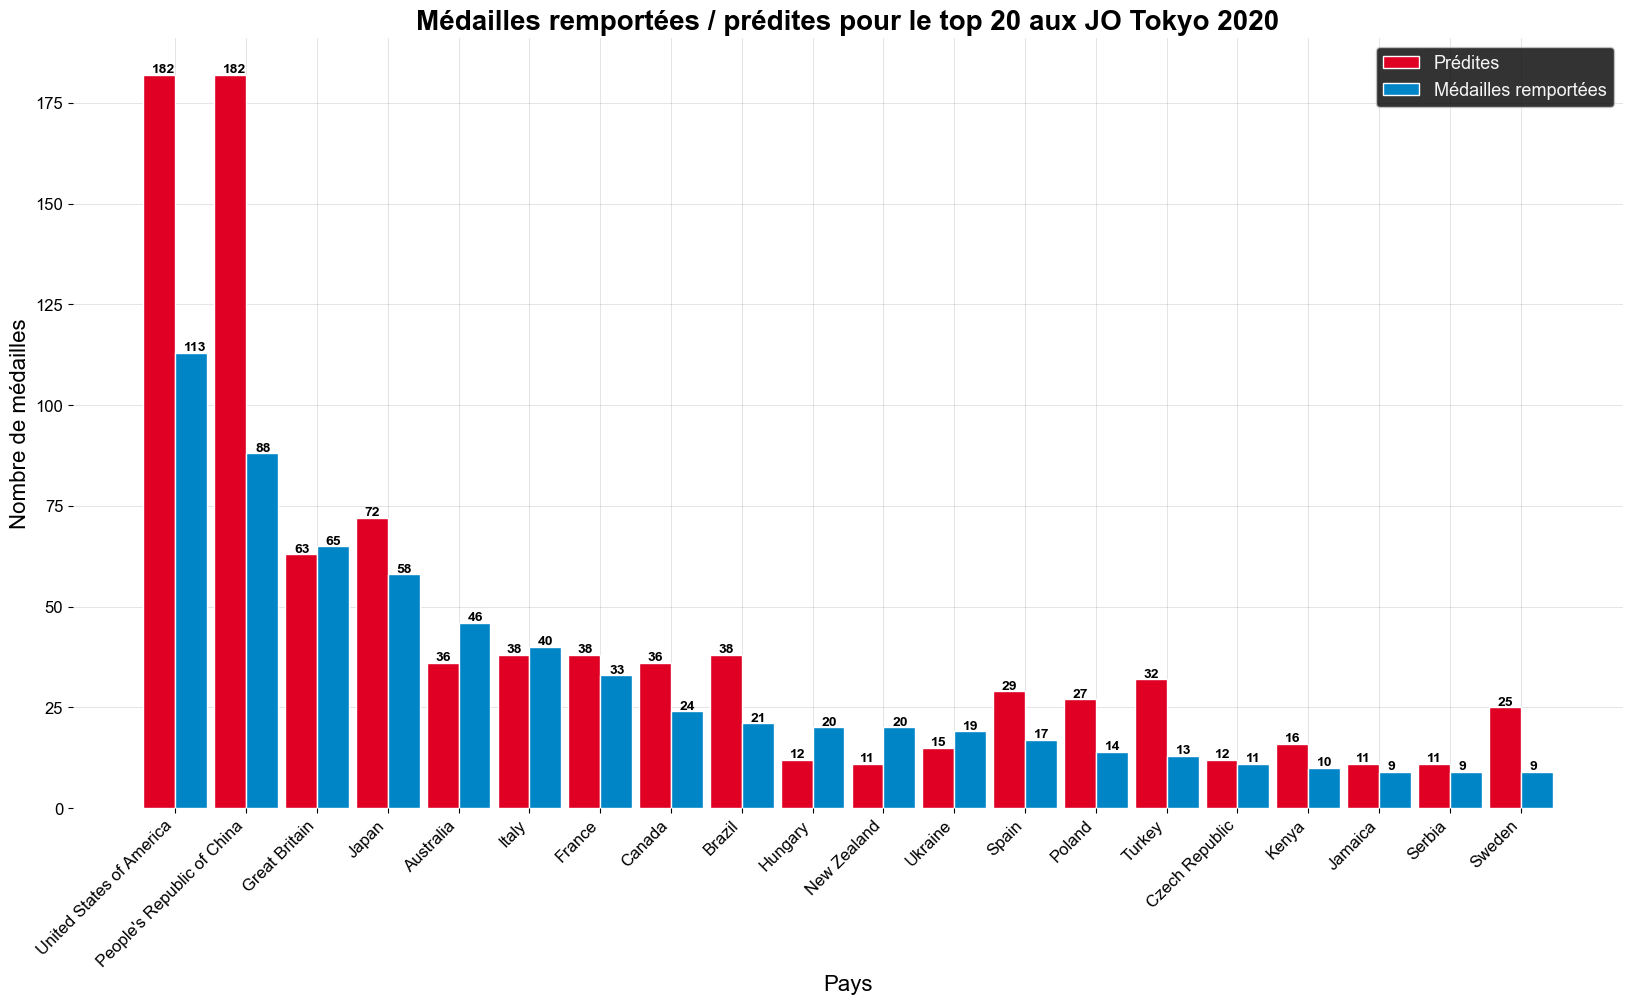

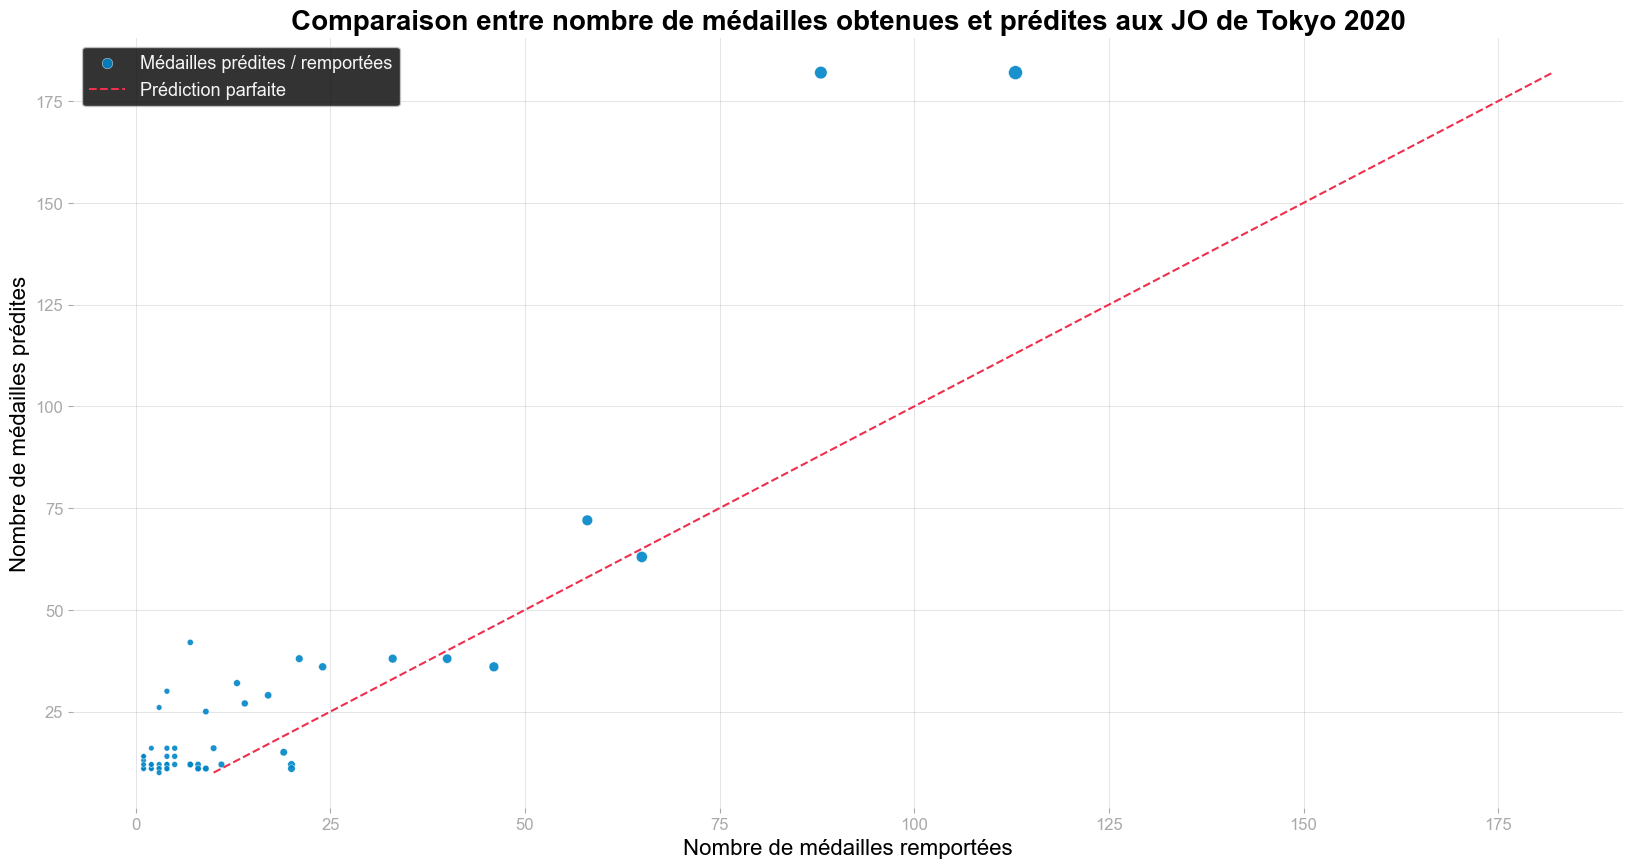

In [55]:
# on va faire la liste des 20 premiers et comparer aux prédictions 
top_20 = df_2020.nlargest(20, "Total")
display(top_20)

# on va faire 2 graphiques 
sb.set_style(style = "ticks")
# définir des couleurs selon la charte des JO 
ncsblue = "#0085C7"
cadmiumred = "#DF0024"
colors = ["#0085C7", "#DF0024"]

# Create the barplot
fig, ax = plt.subplots(figsize=(20, 10))

# Set the bar width
bar_width = 0.45

# Generate the x-axis positions for the bars
x = range(len(top_20))

# Plot the 'Predicted' bars
ax.bar(x, top_20['Predicted'].astype(int), width=bar_width, color=colors[1], label='Prédites')

# Plot the 'Total' bars with an offset
ax.bar([i + bar_width for i in x], top_20['Total'].astype(int), width=bar_width, color=colors[0], label='Médailles remportées')

# Set the x-axis tick positions and labels
ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels(top_20['Country'], rotation=45, ha = "right")

# écrire les axes, légendes et titres 
plt.title('Médailles remportées / prédites pour le top 20 aux JO Tokyo 2020', color = "black", fontsize = 20, fontweight = "bold")
plt.xlabel('Pays', color = "black", fontsize = 16)
plt.xticks(rotation = 45)
plt.ylabel('Nombre de médailles', color = "black", fontsize = 16)
plt.legend(frameon=True, loc='upper right', labelcolor = "whitesmoke", facecolor = "black", fontsize = 13)
# Mettre une grille
plt.grid(True, color = "black", alpha = 0.1)
sb.despine(left=True, bottom=True)
# les ticks 
plt.tick_params(colors='black', labelsize = 12)
# Add value labels on top of each bar
for i, v in enumerate(top_20['Predicted'].astype(int)):
    ax.text(i - 0.1, v + 0.5, str(v), color='black', fontweight='bold')
for i, v in enumerate(top_20['Total'].astype(int)):
    ax.text(i + bar_width - 0.1, v + 0.5, str(v), color='black', fontweight='bold')



# créer le graphe qui compare toutes les prédictions au réel
fig, ax = plt.subplots(figsize=(20, 10))
# taille des points
def scale(x, lower=0, upper=1):
    return ((x - np.min(x)) / (np.max(x) - np.min(x))) * (upper - lower)  + lower

sizes = scale(df_2020["Total"], 15, 100)
# détailler le graphique
sb.scatterplot(data=df_2020, x='Total', y='Predicted', color=ncsblue, label='Médailles prédites / remportées',
               alpha = 0.9, marker = "o", s = sizes)
# Ajouter la ligne de prédiction parfaite
plt.plot([min(df_2020["Predicted"]), max(df_2020["Predicted"])], [min(df_2020["Predicted"]), max(df_2020["Predicted"])], 
         color='#ee2f4d', linestyle='--', label='Prédiction parfaite')
# Mettre les titres et labels
plt.title('Comparaison entre nombre de médailles obtenues et prédites aux JO de Tokyo 2020', color = "black", fontsize = 20, fontweight = "bold")
plt.xlabel('Nombre de médailles remportées', color = "black", fontsize = 16)
plt.ylabel('Nombre de médailles prédites', color = "black", fontsize = 16)
# Mettre une grille
plt.grid(True, color = "black", alpha = 0.1)
# changer le fond 
fig.set_facecolor("white")
ax.set_facecolor("white")
# enlever la ligne 
sb.despine(left=True, bottom=True)
# personnaliser la légende et les ticks
plt.legend(frameon=True, loc='upper left', labelcolor = "whitesmoke", facecolor = "black", fontsize = 13)
plt.tick_params(colors='darkgray', labelsize = 12)

plt.show()


## Comparaison générale des prédictions et des médailles remportées, par pays et par an (canceled)
---
### Création des données
---

In [45]:
# dans un premier temps on va essayer d'intégrer une colonne dans le dataframe de base
# cette colonne représentera les prédictions 
predicted_medal_share = random_forest_model.predict(x)
predicted_medal_share = np.round(predicted_medal_share, decimals = 2)
df_reg["Predicted medal share"] = predicted_medal_share.tolist()
df_reg["Predicted"] = df_reg["Medal share"] * df_reg["Event number"].astype(int) / 100 * 3
df_reg["Predicted"] = np.round(df_reg["Predicted"])
# maintenant on y ajoute les données de 2020 ? 
frames = [df_2020, df_reg]
predictions = pd.concat(frames)
display(predictions)
predictions.to_csv("./predictions.csv")

c:\Users\pauln\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.